# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

План работы: 
1. Ознакомление с данными:</br>
    1.1 Вывод основной информации по таблице</br>
    1.2 Гистограммы по всем основным параметрам</br>
2. Предобработка данных:</br>
    2.1 Обработка названий населенных пунктов</br>
    2.2 Обработка пропусков</br>
    2.3 Изменение типов данных</br>
3. Добавление новых столбцов для для дальнейшего исследования</br>
4. Исследовательский анализ:</br>
    4.1 Изучение параметров, которые могут влиять на стоимость жилья</br>
    4.2 Исследование сроков продажи квартир</br>
    4.3 Нахождение факторов, наиболее влияющих на конечную стоимость квартиры</br>
    4.4 Изучение средней цены квадратного метра жилья в наиболее населенных пунктах</br>
5. Вывод

### Откройте файл с данными и изучите общую информацию

Подключим библиотеки, необходимые для обработки данных и их визуализации.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Читаем файл.

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

Выведем первые 10 строчек таблицы.

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выводим общую информацию о таблице.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограмму всех числовых значений.

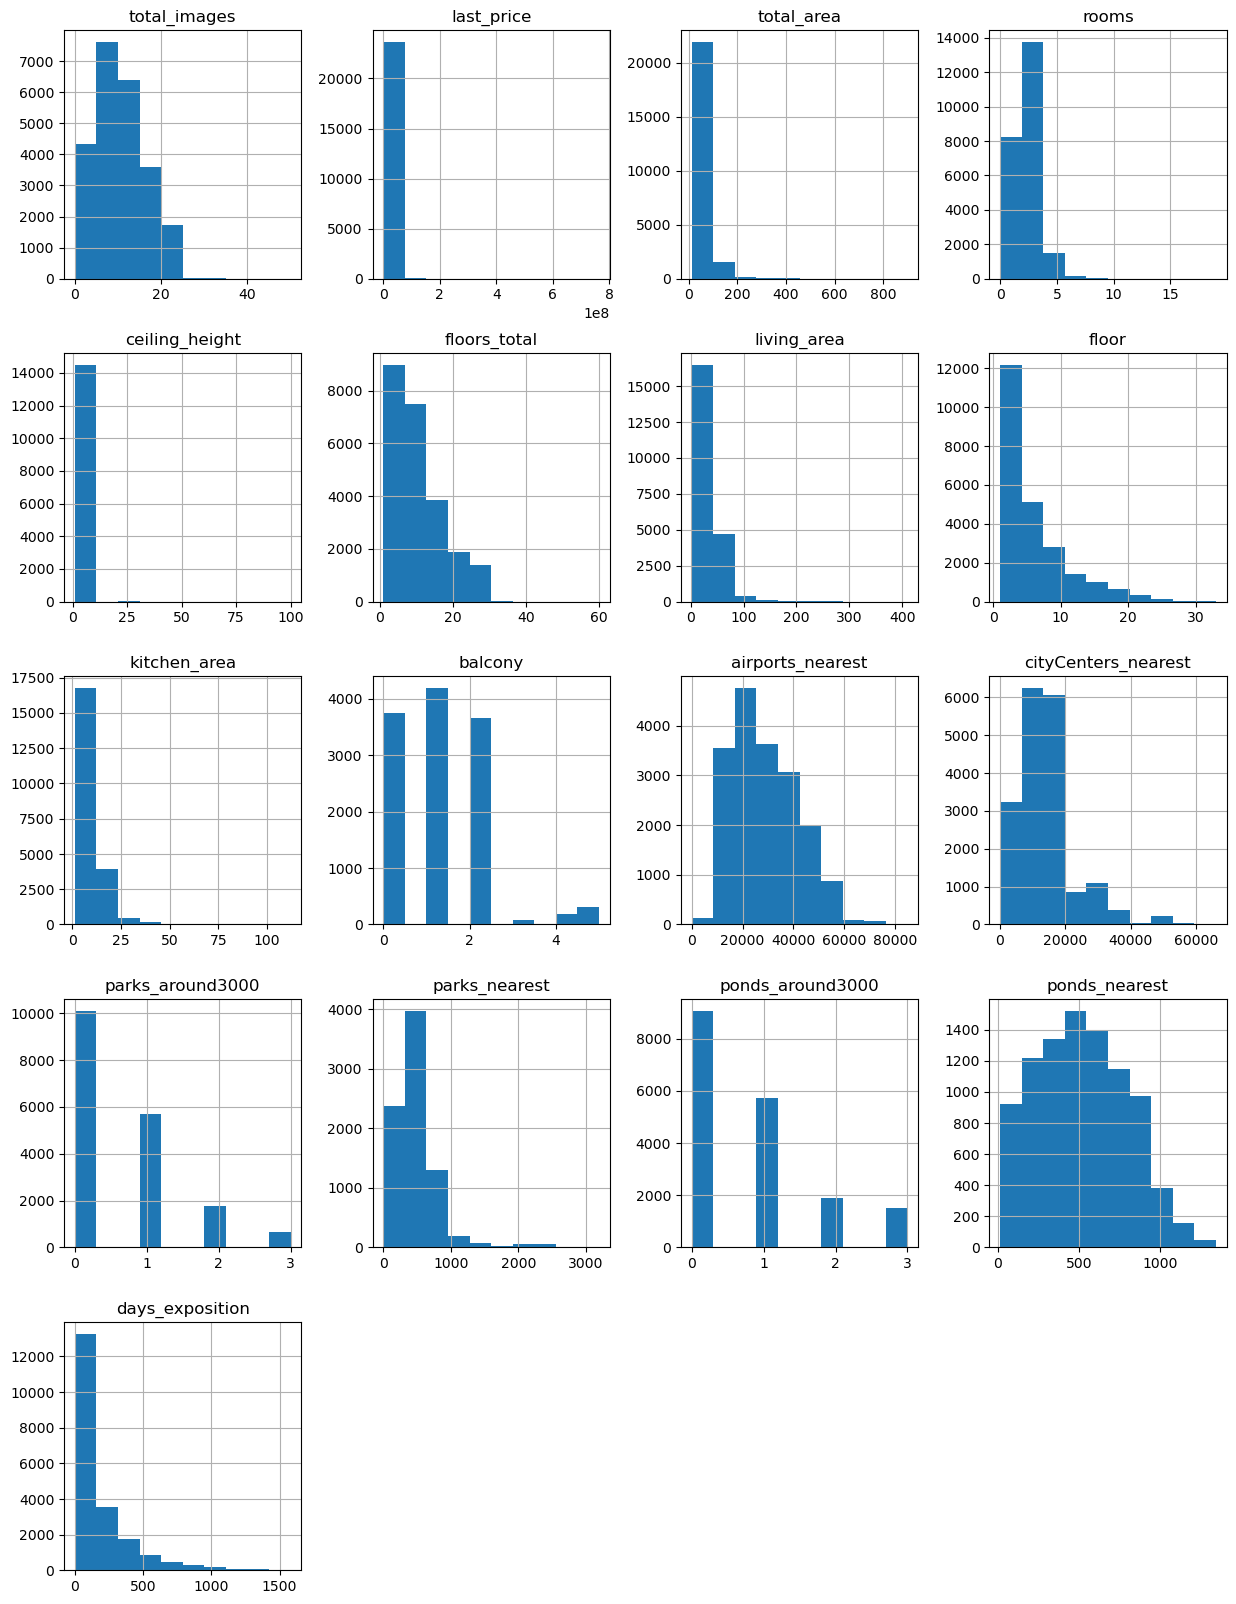

In [5]:
data.hist(figsize=(15, 20))
plt.show()

### Выполните предобработку данных

Выведем снова общую информацию о таблице и рассмотрим, в каких столбцах есть пропуски.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропуски в значениях есть во всех столбцах, кроме 'total_images', 'last_price', 'total_area', 'first_day_exposition', 'rooms', 'floor', 'studio', 'open_plan'.

Запомним количество строк в данных, чтобы в дальнейшем отследить, какое количество останется после обработки.

In [7]:
data_size = data.shape[0]

#### Обработка названий населенных пунктов

Для начала изучим столбец с названиями населенных пунктов и посмотрим, какие уникальные значения есть в этом столбце.

In [8]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [9]:
data['locality_name'].nunique()

364

Создадим столбец с названиями населенных пунктов без указания их типов, чтобы избежать дубликатов названий одного и того же населенного пункта.

In [10]:
data['locality_name_clear'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа ', 
                     'городской поселок ', 
                     'коттеджный поселок ', 
                     'поселок при железнодорожной станции ',
                     'поселок станции ',
            ], 'поселок ', regex=True)
    .replace(['садовое товарищество ', 'садоводческое некоммерческое товарищество '], 'СНТ ', regex=True)
) 

In [11]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_clear
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок Шушары
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


In [12]:
data['locality_name_clear'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский', 'СНТ Новая Ропша',
       'Павловск', 'деревня Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'деревня Куттузи',
       'поселок Аннино', 'поселок Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 

In [13]:
data['locality_name_clear'].nunique()

318

Как видно, уникальных названий населенных пунктов стало 318 вместо 364 изначально.

Также стоит отметить, что среди названий населенных пунктов можно увидеть 'nan'. В самом деле, если посмотреть в информацию о таблице, то можно заметить, что в 50 объявлениях не указан насёленный пункт. Вероятно, владельцы при заполнении объявления забыли указать названия пункта, или же произошла ошибка при выгрузке данных.

#### Обработка пропусков

Перейдем к обработке пропущенных значений. Заполним пропуски там, где это возможно. Начнём со столбца 'ceiling_height'.

Сгруппируем строки по названию населенного пункта и заполним пропуски в высоте потолков медианным значением по каждой группе.

In [14]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('locality_name')['ceiling_height'].transform('median'))

Для заполнения пропусков в столбцах 'living_area' и 'kitchen_area' воспользуемся соотношением между кухней и жилым помещением. Возьмем медиану от этого отношения и с помощью этого значения заполним пропуски.

In [15]:
living_total_area_proportion = data['total_area'].median() / data['living_area'].median()
kitchen_total_area_proportion = data['total_area'].median() / data['kitchen_area'].median()
data['living_area'] = data['living_area'].fillna(data['total_area'] / living_total_area_proportion)
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] / kitchen_total_area_proportion)

Пропуски в столбце 'is_apartment' заменим на False.

In [16]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Пропуски в столбце 'balcony' заменим на 0, так как скорее всего балконов у таких квартир нет.

In [17]:
data['balcony'] = data['balcony'].fillna(0)

Строки с оставшимися пропусками значений в стобцах 'locality_name', 'ceiling_height', 'floors_total' удалим.

In [19]:
data = data.dropna(subset=['locality_name', 'ceiling_height', 'floors_total'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23445 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23445 non-null  int64  
 1   last_price            23445 non-null  float64
 2   total_area            23445 non-null  float64
 3   first_day_exposition  23445 non-null  object 
 4   rooms                 23445 non-null  int64  
 5   ceiling_height        23445 non-null  float64
 6   floors_total          23445 non-null  float64
 7   living_area           23445 non-null  float64
 8   floor                 23445 non-null  int64  
 9   is_apartment          23445 non-null  bool   
 10  studio                23445 non-null  bool   
 11  open_plan             23445 non-null  bool   
 12  kitchen_area          23445 non-null  float64
 13  balcony               23445 non-null  float64
 14  locality_name         23445 non-null  object 
 15  airports_nearest      18

#### Изменение типов данных

Заменим тип данных в стобце 'first_day_exposition' на datetime и сразу же округлим дату до одного дня.

In [21]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S").dt.round('1d')

Также изменим тип данных столбоцов 'floors_total', 'balcony', 'last_price' на int.

In [22]:
columns_to_change = ['floors_total', 'balcony', 'last_price']
data[columns_to_change] = data[columns_to_change].astype(int)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23445 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23445 non-null  int64         
 1   last_price            23445 non-null  int32         
 2   total_area            23445 non-null  float64       
 3   first_day_exposition  23445 non-null  datetime64[ns]
 4   rooms                 23445 non-null  int64         
 5   ceiling_height        23445 non-null  float64       
 6   floors_total          23445 non-null  int32         
 7   living_area           23445 non-null  float64       
 8   floor                 23445 non-null  int64         
 9   is_apartment          23445 non-null  bool          
 10  studio                23445 non-null  bool          
 11  open_plan             23445 non-null  bool          
 12  kitchen_area          23445 non-null  float64       
 13  balcony              

In [24]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_clear
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.600000,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок Шушары
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.300000,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000,159.0,2015-07-24,3,2.70,14,91.730769,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


### Добавьте в таблицу новые столбцы

Добавим столбец с ценой одного квадратного метра для каждого объявления.

In [25]:
data['per_meter_price'] = round((data['last_price'] / data['total_area']), 2)

Добавим столбец с днём недели публикации объявления.

In [26]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

Столбец с месяцем публикации объявления.

In [27]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Столбец с годом публикации объявления.

In [28]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Столбец с типом этажа квартиры создадим с помощью специальной функции.

In [29]:
def define_floor_type(flat):
    if flat['floor'] == 1:
        return 'первый'
    elif flat['floor'] == flat['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [30]:
data['floor_type'] = data.apply(define_floor_type, axis=1)

Столбец с расстоянием до центра города в километрах.

In [31]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

In [32]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_clear,per_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.600000,1,False,...,0.0,NaN,81.0,поселок Шушары,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.300000,4,False,...,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.70,14,91.730769,9,False,...,3.0,234.0,424.0,Санкт-Петербург,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1.0,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

#### Исследование параметров

##### Изучим данные столбца **'total_area'**.

In [33]:
data['total_area'].describe()

count    23445.000000
mean        60.385002
std         35.726061
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

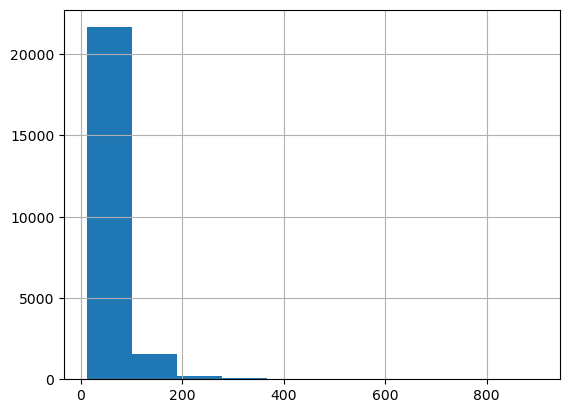

In [34]:
data['total_area'].hist()
plt.show()

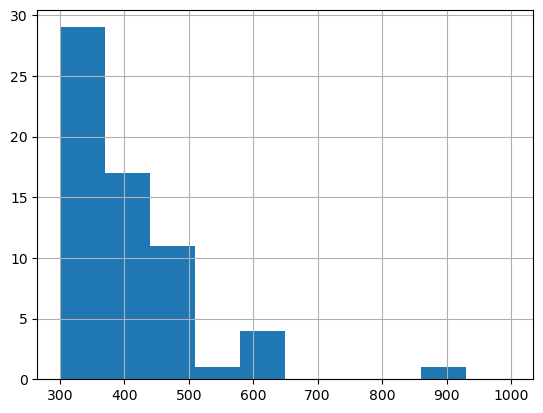

In [35]:
data['total_area'].hist(range=(300, 1000))
plt.show()

Судя по данным, имеется выброс в районе 900 метров. Посмотрим, что это за объявление. 

In [36]:
data.query('total_area == 900')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_clear,per_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
19540,8,420000000,900.0,2017-12-06,12,2.8,25,409.7,25,False,...,2.0,318.0,106.0,Санкт-Петербург,466666.67,2,12,2017,последний,8.0


Очевидно, что объявление составлено корректно. Но для нас оно, как и объявления с >300 метрами общей площади, является выбросом. Отфильтруем данные и выберем промежуток от 0 до 300 метров.

In [37]:
data = data.query('total_area < 300')

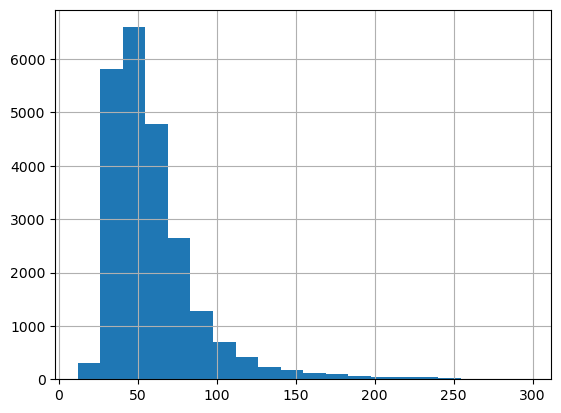

In [38]:
data['total_area'].hist(bins=20)
plt.show()

Как видно, наиболее распространены объявления с общей площадью квартиры от 30 до 80 метров.

##### Изучим данные столбца **'living_area'**.

In [39]:
data['living_area'].describe()

count    23382.000000
mean        34.132122
std         19.796945
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        250.000000
Name: living_area, dtype: float64

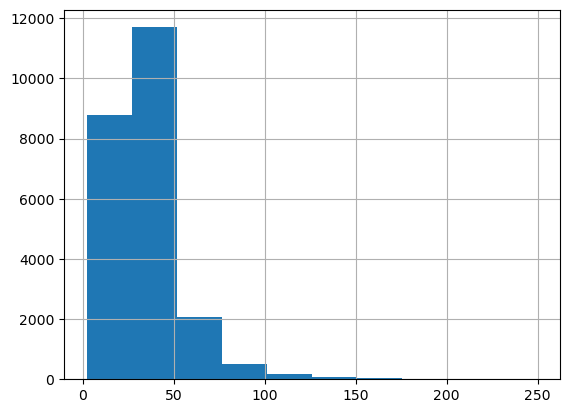

In [40]:
data['living_area'].hist()
plt.show()

Здесь видим маленькое значение минимальной жилой площади - 2 метра. Посмотрим, какие ещё есть экстремально маленькие значения.

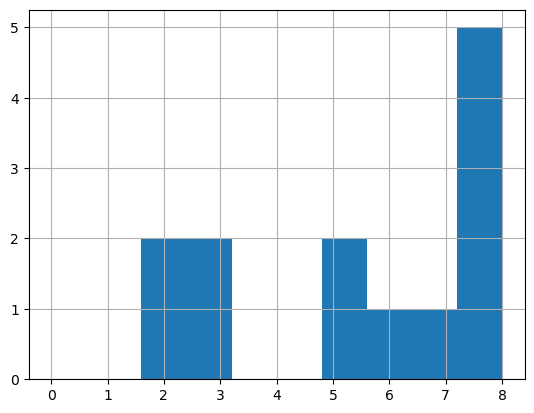

In [41]:
data['living_area'].hist(range=(0,8))
plt.show()

Удалим выбросы и выведем гистрограмму, взяв значения от 10 до 100 местров.

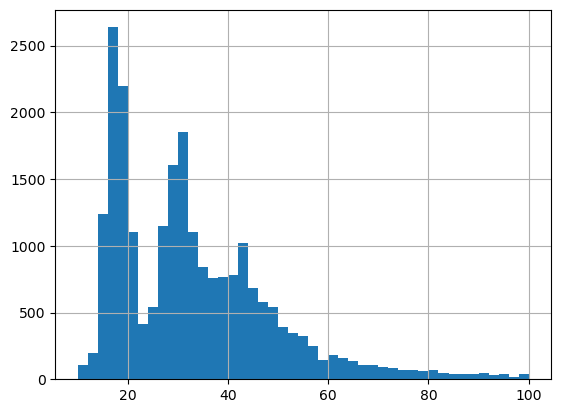

In [42]:
data['living_area'].hist(range=(10, 100), bins=45)
plt.show()

Наблюдается два пика в области 18 и 30 метров. Вероятно, это связанно с типовой застройкой многих домов. Можно предположить, что первый пик создан однокомнатными квартирами, а второй - двухкомнатными. Проверим это, создав диаграмму рассеяния.

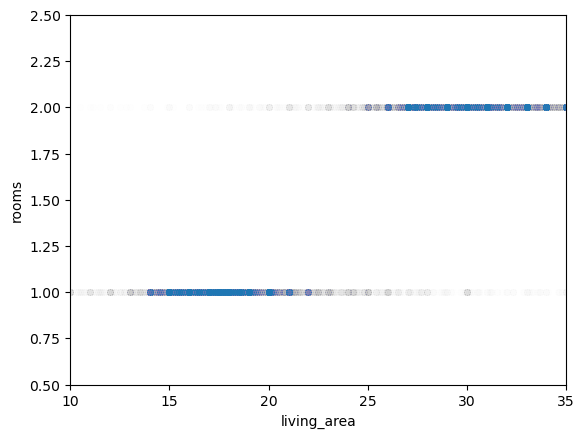

In [43]:
data.plot(x='living_area', 
          y='rooms', 
          xlim=(10, 35), 
          ylim=(0.5, 2.5), 
          kind='scatter', 
          alpha=0.003)
plt.show()

##### Теперь рассмотрим данные столбца **'kitchen_area'**.

In [44]:
data['kitchen_area'].describe()

count    23382.000000
mean        10.420764
std          5.679085
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

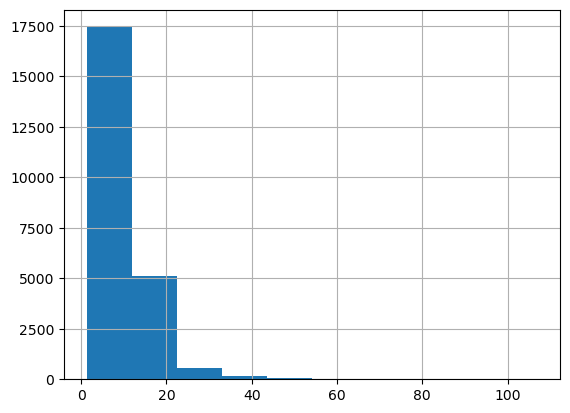

In [45]:
data['kitchen_area'].hist()
plt.show()

Выберем объявления с площадью кухни до 40 метров и снова построим гистограмму.

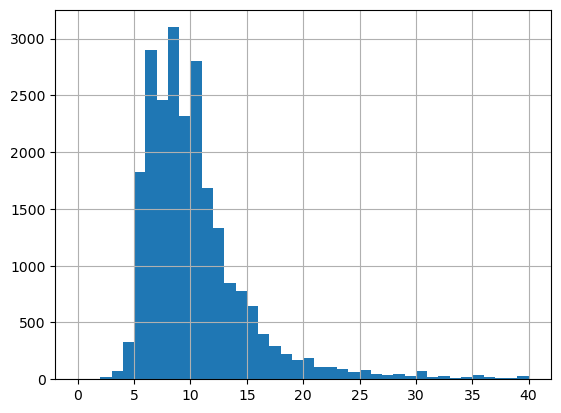

In [46]:
data['kitchen_area'].hist(range=(0, 40), bins=40)
plt.show()

Наиболее часто квартира имеет кухню с площадью от 6 до 12 метров.

##### Рассмотрим столбец **'last_price'**.

In [47]:
data['last_price'].describe()

count    2.338200e+04
mean     6.322424e+06
std      7.780125e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

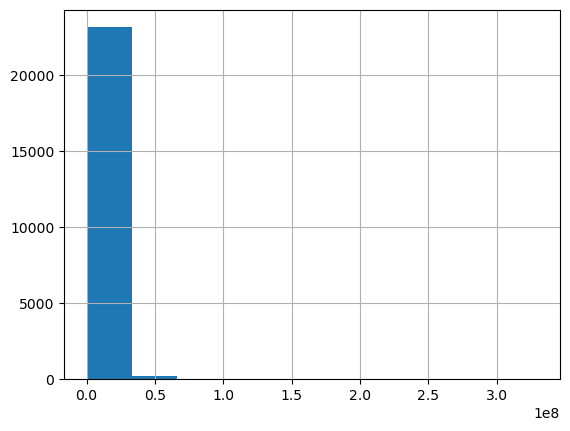

In [48]:
data['last_price'].hist()
plt.show()

Удалим объявления со стоимостью более 30 миллионов рублей и заново построим гистограмму.

In [49]:
data = data.query('last_price < 30000000')

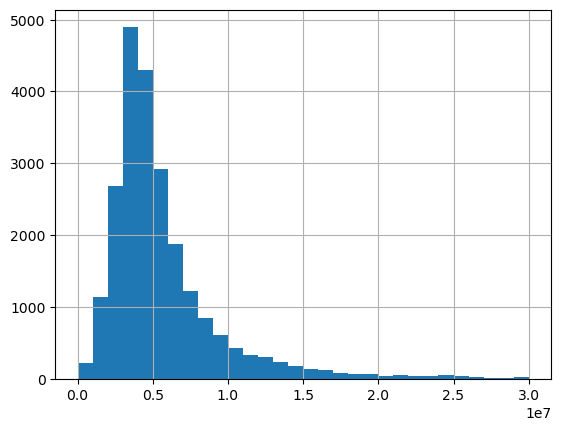

In [50]:
data['last_price'].hist(bins=30)
plt.show()

Чаще всего встречаются объявления со стоимостью от 2 до 6 миллионов рублей.

##### Рассмотрим столбец **'rooms'**.

In [51]:
data['rooms'].describe()

count    23109.000000
mean         2.037777
std          1.021324
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

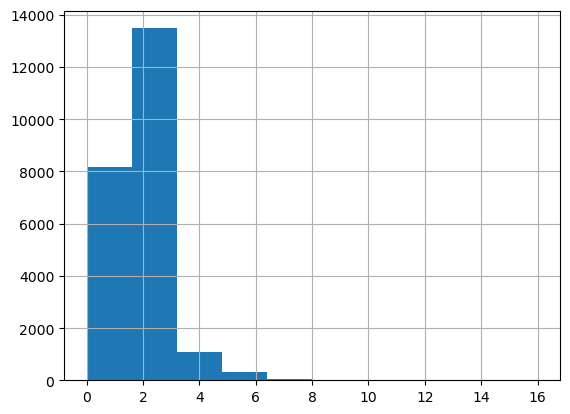

In [52]:
data['rooms'].hist()
plt.show()

Удалим объявления с количеством комнат более 7.

In [53]:
data = data.query('rooms <= 7')

Среди объявлений есть квартиры с 0 комнатами. Вероятно, это квартиры-студии.

In [54]:
data.query('rooms == 0').shape[0]

191

In [55]:
data.query('rooms == 0 and studio == False').shape[0]

57

Но в 57 объявлениях квартиры, не являющиеся студиями, имеют 0 комнат. Удалим их.

In [56]:
data = data.query('rooms > 0 or studio == True')

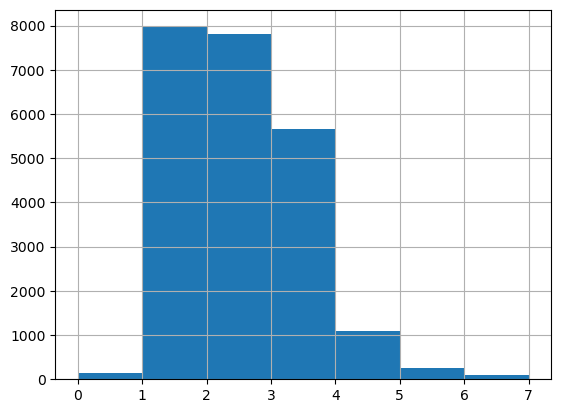

In [57]:
data['rooms'].hist(bins=7)
plt.show()

Очевидно, подавляющее большинство объявлений - однокомнатные, двухкомнатные и трёхкомнатные квартиры.

##### Рассмотрим столбец **'ceiling_height'**.

In [58]:
data['ceiling_height'].describe()

count    23037.000000
mean         2.727257
std          1.008041
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

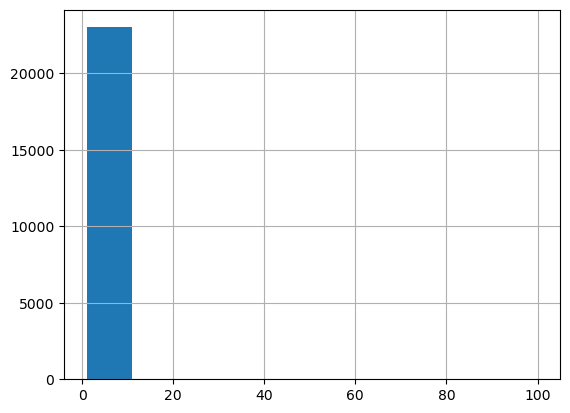

In [59]:
data['ceiling_height'].hist()
plt.show()

Очевидно, имеются объявления с аномально высокими потолками. Рассмотрим, эти значения.

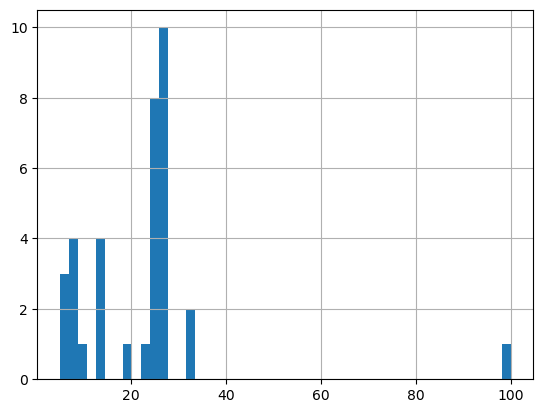

In [60]:
data['ceiling_height'].hist(range=(5,100),bins=50)
plt.show()

Вероятно, такие большие значения указаны владельцами при подаче объявления случайно. Рассмотрим начения высоты потолков в промежутке от 20 до 30 метров.

In [61]:
data.query('20 <= ceiling_height <= 40').pivot_table(index='ceiling_height', values='last_price', aggfunc='count')

,last_price
ceiling_height,
20.0,1
22.6,1
24.0,1
25.0,7
26.0,1
27.0,8
27.5,1
32.0,2


Судя по значениям 25, 27 и 32, они были записаны случайно вместо 2.5 , 2.7 и 3.2. Заменим значения в этом промежутке на те же, делённые на 10. Прочие как выбросы удалим.

In [62]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if 20 < x < 40 else x)

In [63]:
data = data.query('ceiling_height < 4')

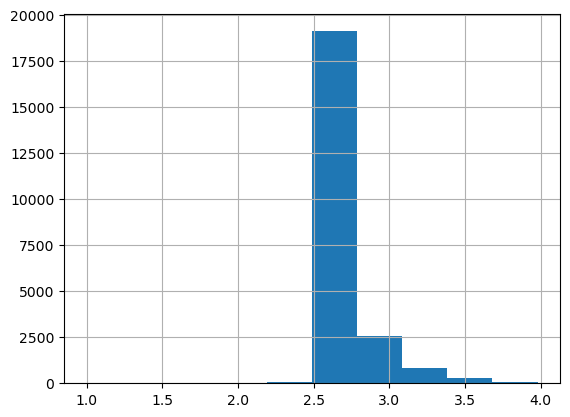

In [64]:
data['ceiling_height'].hist()
plt.show()

Также удалим маленькие значения высоты потолка.

In [65]:
data = data.query('ceiling_height > 2')

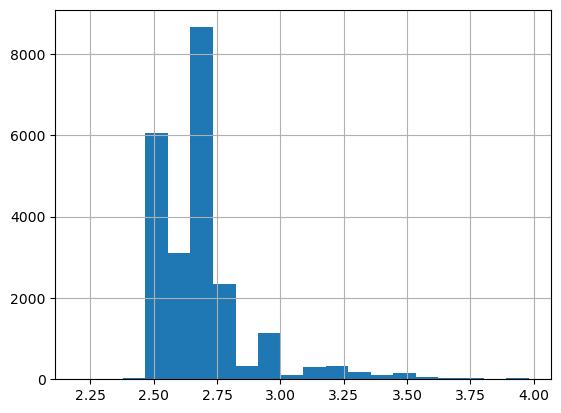

In [66]:
data['ceiling_height'].hist(bins=20)
plt.show()

Пики в значениях 2.5 и 2.7 вполне ожидаемы: большинство домов типовой застройки.

##### Рассмотрим столбец **'floor_type'**.

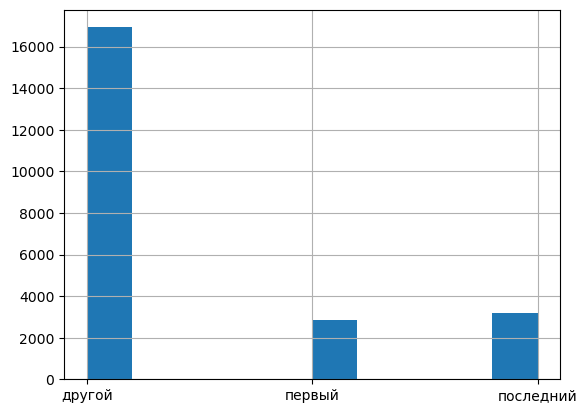

In [67]:
data['floor_type'].hist()
plt.show()

##### Рассмотрим столбец **'floors_total'**.

In [68]:
data['floors_total'].describe()

count    22950.000000
mean        10.753464
std          6.605447
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

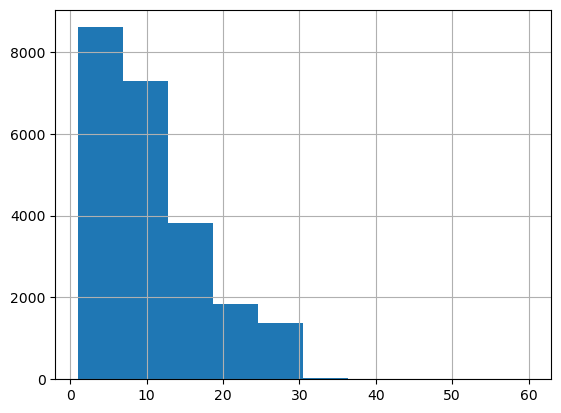

In [69]:
data['floors_total'].hist()
plt.show()

Рассмотрим значения выше 30.

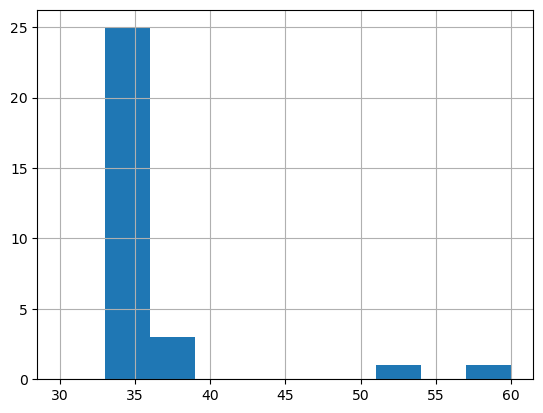

In [70]:
data['floors_total'].hist(range=(30, 60))
plt.show()

Удалим выбросы в значениях более 30 и заново построим гистрограмму.

In [71]:
data = data.query('floors_total < 30')

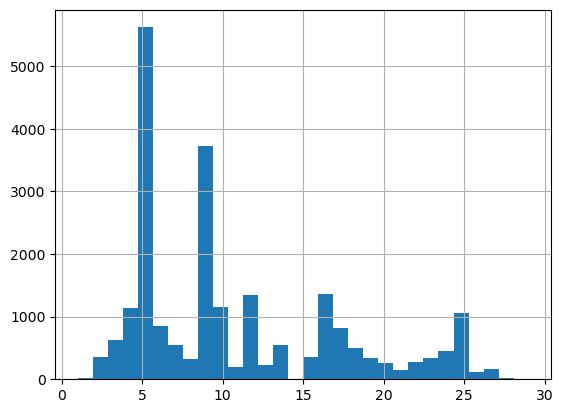

In [72]:
data['floors_total'].hist(bins=30)
plt.show()

Пики в значениях 5 и 9 также ожидаемы: многие дома типовой застройки.

##### Рассмотрим столбец **'cityCenters_nearest'**.

In [73]:
data['cityCenters_nearest'].describe()

count    17591.000000
mean     14365.705588
std       8585.002474
min        208.000000
25%       9593.000000
50%      13218.000000
75%      16347.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

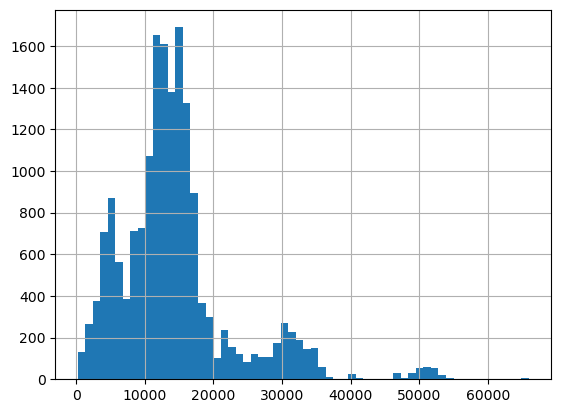

In [74]:
data['cityCenters_nearest'].hist(bins=60)
plt.show()

Как видно, большая часть объявлений - квартиры в радиусе от 8 до 18 километров до центра Санкт-Петербурга.

##### Рассмотрим **'parks_nearest'**.

In [75]:
data['parks_nearest'].describe()

count    7717.000000
mean      493.302967
std       342.512984
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

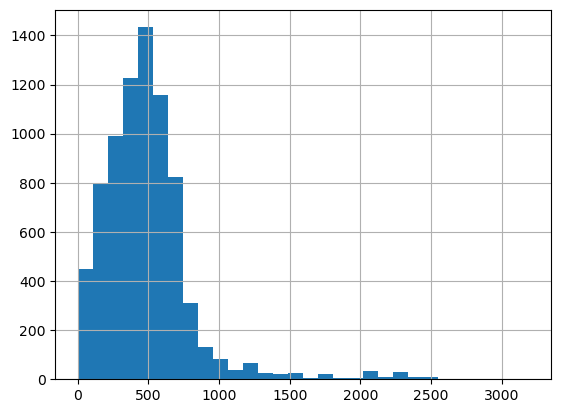

In [76]:
data['parks_nearest'].hist(bins=30)
plt.show()

Большинство квартир находится на расстоянии до 800 метров до ближайшего парка.

In [77]:
clear_data_percent = data.shape[0] / data_size
clear_data_percent

0.9671294147432381

#### Как быстро продаются квартиры?

Рассмотрим столбец 'days_exposition' и определим, как долго обычно выставляются квартиры.

In [78]:
data['days_exposition'].describe()

count    19892.000000
mean       179.523728
std        218.408830
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

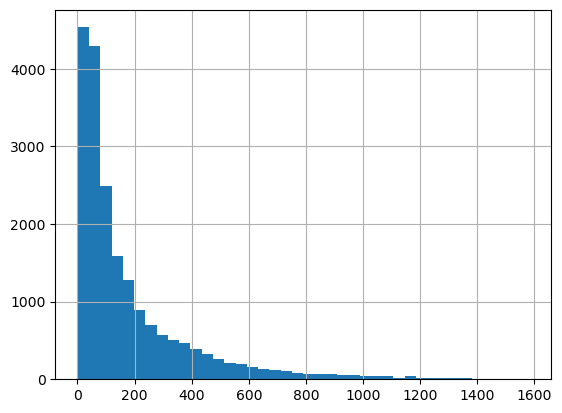

In [79]:
data['days_exposition'].hist(bins=40)
plt.show()

Как видно, от выставления объявления до его снятия проходит обычно 3 месяца. Быстрыми можно считать продажи, совершенные в течение 1.5 месяцев после публикации объявления, а долгими - через 8 месяцев после публикации.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

##### Зависимость стоимости квартиры от общей площади.

Составим сводную таблицу, в которой высчитаем среднюю стоимость квартиры в зависимости от её метража.

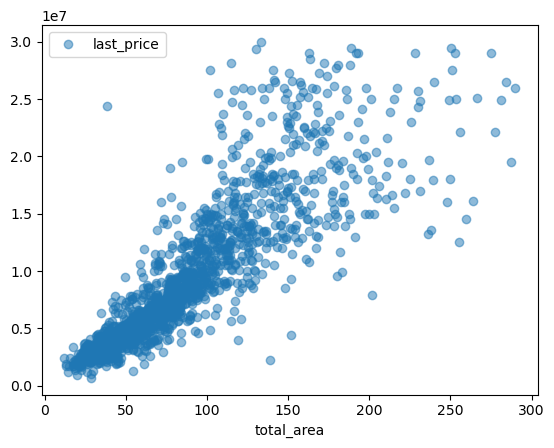

In [80]:
total_area_pivot_table = data.pivot_table(index='total_area', values='last_price', aggfunc='median')
total_area_pivot_table.plot(style='o', alpha=0.5)
plt.show()

In [81]:
data['last_price'].corr(data['total_area'])

0.7907997859625222

Очевидно, стоимость квартиры очень зависит от её площади: с увеличением количества метров растёт и стоимость, что весьма логично.

##### Зависимость стоимости квартиры от площади кухни.

Составим сводную таблицу, в которой высчитаем среднюю стоимость квартиры в зависимости от площади её кухни.

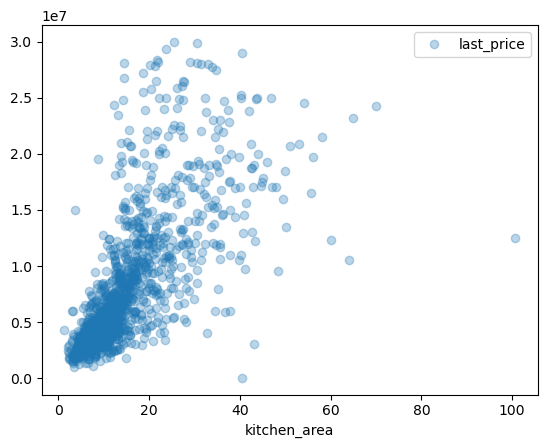

In [82]:
kitchen_area_pivot_table = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
kitchen_area_pivot_table.plot(style='o', alpha=0.3)
plt.show()

In [83]:
data['last_price'].corr(data['kitchen_area'])

0.6216487589876364

Связь между площадью кухни и стоимостью квартиры не так высока, как в предыдущем пункте. В самом деле, квартиры с одинаковыми по площади кухнями могут иметь разное количество комнат и, соотвественно, разную общую площадь и итоговую стоимость.

##### Зависимость стоимости квартиры от жилой площади.

Составим сводную таблицу, в которой высчитаем среднюю стоимость квартиры в зависимости от её жилой площади.

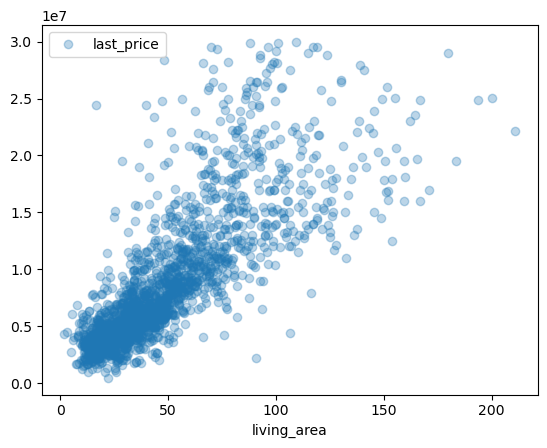

In [84]:
living_area_pivot_table = data.pivot_table(index='living_area', values='last_price', aggfunc='median')
living_area_pivot_table.plot(style='o', alpha=0.3)
plt.show()

In [85]:
data['last_price'].corr(data['living_area'])

0.6917916379376147

Связь между жилой площадью и стоимость квартиры есть, но она всё также меньше, чем связь общей площади и стоимости.

##### Зависимость стоимости квартиры от количества комнат.

Составим сводную таблицу, в которой высчитаем среднюю стоимость квартиры в зависимости от количества комнат в ней.

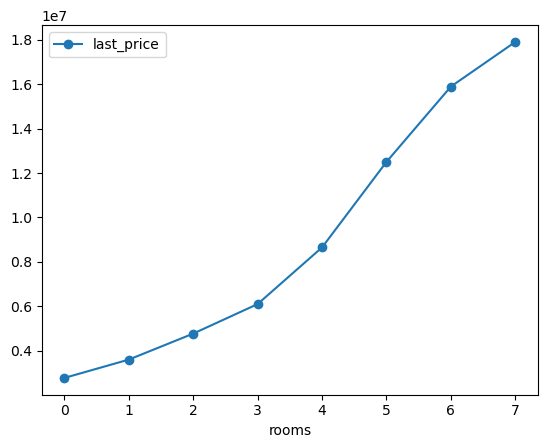

In [86]:
rooms_pivot_table = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
rooms_pivot_table.plot(style='o-', alpha=1)
plt.show()

In [87]:
data['last_price'].corr(data['rooms'])

0.5125474590892022

Связь между количеством комнат и стоимостью квартиры присуствует. Стоимость квартиры увеличивается при увеличении комнат в ней.

##### Зависимость стоимости квартиры от этажа.

Составим сводную таблицу, в которой высчитаем среднюю стоимость квартиры в зависимости от этажа, на котором она находится.

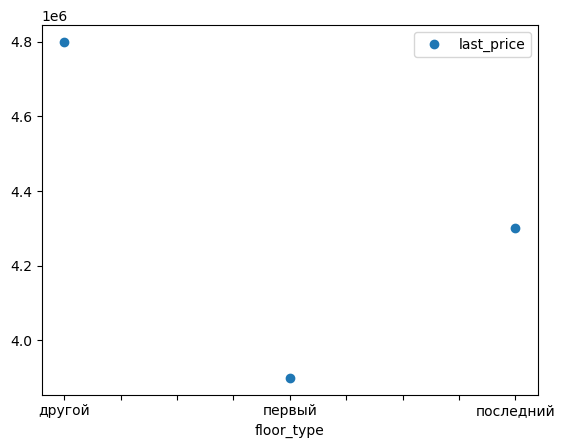

In [88]:
floor_pivot_table = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
floor_pivot_table.plot(style='o', alpha=1)
plt.show()

В среднем квартиры на первом и последнем этаже стоят меньше, чем квартиры на других этажах.

##### Зависимость стоимости квартиры от даты размещения объявления

Рассмотрим зависимость стоимости квартиры от года, месяца и дня недели подачи объявлеения.

,count_last_price,count_total_area,median_last_price,median_total_area
year_exposition,,,,
2014,128,128,7388280,75.015
2015,1114,1114,5200000,59.100
2016,2662,2662,4500000,53.000
2017,7920,7920,4500000,51.200
2018,8302,8302,4550000,50.100
2019,2794,2794,5000000,51.200


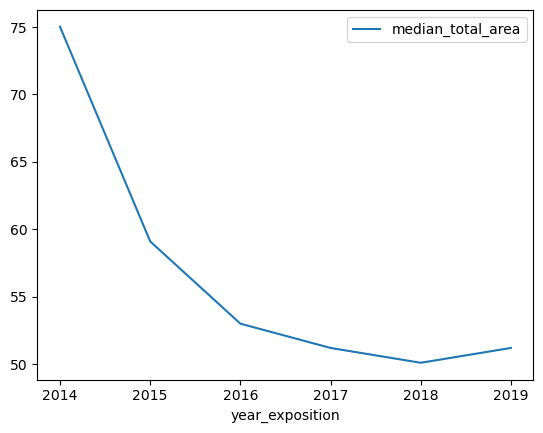

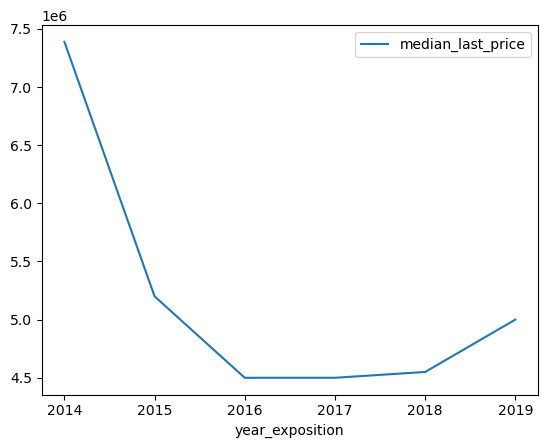

,count_last_price,count_total_area,median_last_price,median_total_area
month_exposition,,,,
1,1452,1452,4590000,51.00
2,2562,2562,4647000,52.15
3,2504,2504,4600000,51.00
4,2306,2306,4780000,52.00
5,1231,1231,4500000,51.00
6,1694,1694,4394500,50.00
7,1642,1642,4600000,51.00
8,1693,1693,4550000,51.00
9,1915,1915,4690000,52.00


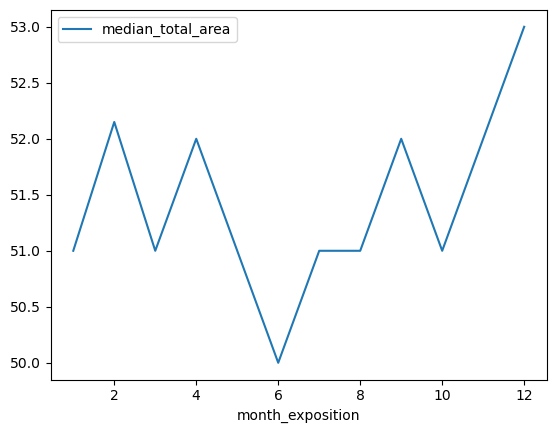

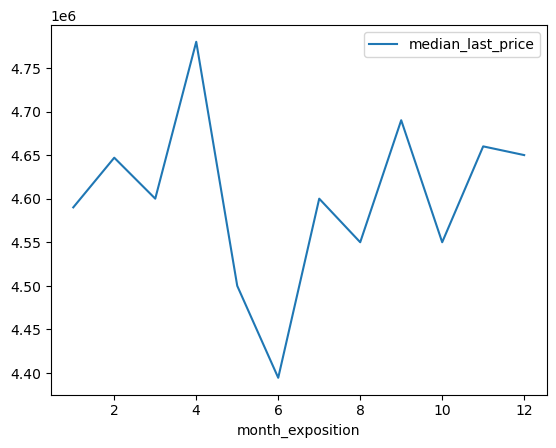

,count_last_price,count_total_area,median_last_price,median_total_area
weekday_exposition,,,,
0,3514,3514,4600000,52.0
1,4061,4061,4700000,51.7
2,3846,3846,4690000,52.0
3,4142,4142,4600000,52.0
4,3869,3869,4550000,50.7
5,1860,1860,4500000,50.0
6,1628,1628,4500000,51.0


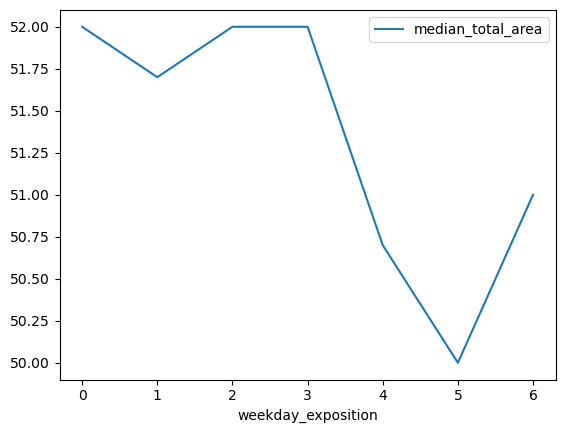

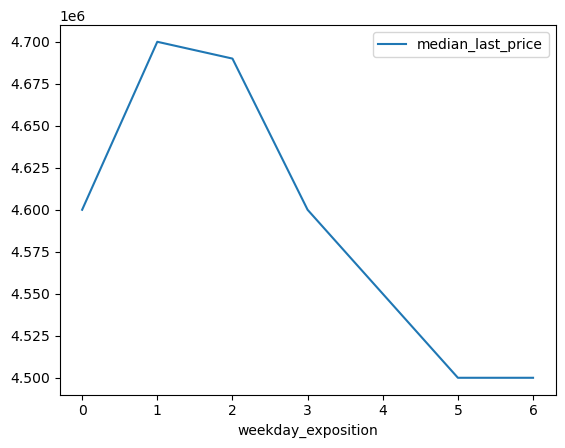

In [89]:
periods = ['year_exposition', 'month_exposition', 'weekday_exposition']

for period in periods:
    pivot_table_for_priod = data.pivot_table(index=period, values=['last_price', 'total_area'], aggfunc=['count', 'median'])
    pivot_table_for_priod.columns = ['count_last_price', 'count_total_area', 'median_last_price', 'median_total_area']
    display(pivot_table_for_priod)
    pivot_table_for_priod.plot(y='median_total_area')
    pivot_table_for_priod.plot(y='median_last_price')
    plt.show()

Для начала рассмотрим стоимость квартир в зависимости от года. Данные за 2014 год учитывать не будем, так как выборка не показательна, обявлений мало. 

В 2015 году средняя стоимость квартиры составила 5,2 миллиона рублей. В 2016-2018 годы стоимость упала и уже составляла в среднем 4,5 - 4,55 миллиона. В 2019 году этот показатель вырос и составил 5 миллионов рублей. 

Перейдем к зависимости стоимости от месяца выставления объявления. Наиболее дорогими в среднем оказались квартиры, выставленные в апреле: их средняя стоимость составила 4,78 миллиона рублей. Наиболее дешёвые квартиры выставлялись в июне со средней стоимостью 4,39 миллиона рублей.

Рассмотрим зависимость стоимости от дня недели, когда выставлялось объявление. Квартиры, выставлявшиеся по вторникам и средам, оказались немного дороже остальных квартир: их средняя стоимость составила около 4,7 миллиона рублей. Дешевле других были квартиры, которые выставляли в выходные дни - в среднем по 4,5 миллиона рублей.

При изучении графиков изменения медианной общей площади выставляемых квартир за соотвествующие временные промежутки можно заметить, что общая площадь изменяется аналогично медианной стоимости квартир. Напрашивается вывод, что средняя стоимость квартир зависит именно от медианного значения общей площади квартир, выставленных в соотвествующий период.


#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [90]:
fist_10_localities = data.pivot_table(index='locality_name_clear', # создаём сводную таблицу по населённым пунктам
                                      values='per_meter_price',    # и считаем количество объявлений и медианное значение
                                      aggfunc=['count', 'median']) # квадратного метра в каждом

fist_10_localities.columns = ['count', 'median'] # избавляемся от мультииндекса

fist_10_localities = (fist_10_localities
                      .sort_values('count', ascending=False)[:10] # сначала сортируем таблицу по убыванию количества объявлений
                      .sort_values('median', ascending=False)     # и выбираем первые 10 строк, потом их сортируем по убыванию 
                     )                                            # значений в столбце со среденим значением квадратного метра

fist_10_localities

,count,median
locality_name_clear,,
Санкт-Петербург,15188,104064.540
Пушкин,365,99987.180
поселок Парголово,324,91780.225
деревня Кудрово,287,91666.670
поселок Мурино,545,85680.500
поселок Шушары,439,76829.270
Колпино,337,74722.220
Гатчина,306,67860.570
Всеволожск,395,65789.470


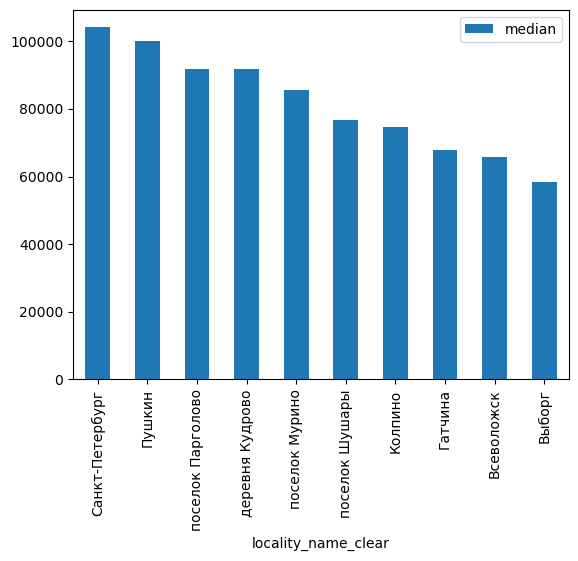

In [91]:
fist_10_localities.plot(kind='bar', y='median')
plt.show()

Наиболее дорогим квадратный метр жилья оказался в Санкт-Петербурге и Пушкине, а наиболее дешёвым - во Всеволожске и Выборге.

#### Зависимость стоимости жилья в Санкт-Петербурге от расстояния до центра города.

Посчитаем среднюю стоимость квадратного метра от расстояния до центра в километрах. И выведем график.

In [92]:
per_meter_km_dependence = (data
                           .query('locality_name == "Санкт-Петербург"')
                           .pivot_table(index='cityCenters_nearest_km', 
                                        values='last_price', 
                                        aggfunc=['count', 'median'])
                          )
per_meter_km_dependence.columns = ['count', 'median']
per_meter_km_dependence

,count,median
cityCenters_nearest_km,,
0.0,13,9590000
1.0,162,9995000
2.0,268,9400000
3.0,330,8300000
4.0,647,8900000
5.0,846,8970000
6.0,542,8150000
7.0,366,6994500
8.0,579,7300000


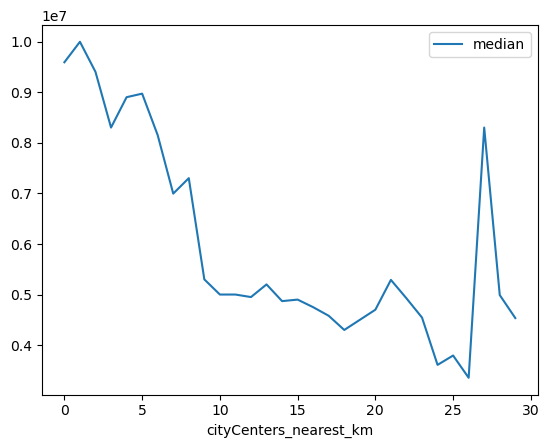

In [93]:
per_meter_km_dependence.plot(y='median')
plt.show()

In [94]:
data.query('locality_name == "Санкт-Петербург" and 10 <= cityCenters_nearest_km <= 22')['last_price'].median()

4900000.0

Как и ожидалось, средняя цена квартиры увеличивается с приближением к центру города. На промежутке от 10 до 22 километра до центра средняя цена на квартиру примерно одинакова и равна 4,9 миллионам рублей. Начиная с 10 километра и до самого центра Санкт-Петербурга цены на жильё начинают стремительно расти вплоть до 10 миллионов в среднем за квартиру в центре города. 

Данные за 27-29 километры не показательны, так как соответствующих объявлений мало. Поэтому их не учитываем.

### Напишите общий вывод

В ходе проведения исследовательского анализа были изучены данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

При предобработке данных были обнаружены пропуски в следующих столбцах таблицы: 
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name
- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- days_exposition

Названия насёленных пунктов из столбца 'locality_name' были приведены к единому виду: 
- Буквы 'ё' заменены на 'е'.
- Части названий населенных пунктов 'поселок городского типа ', 'городской поселок ', 'коттеджный поселок ', 'поселок при железнодорожной станции ', 'поселок станции ' заменены на 'поселок '.
- Части названий населенных пунктов 'садовое товарищество ', 'садоводческое некоммерческое товарищество ' заменены на 'СНТ '.

Измененные названия населенных пунктов записаны в столбец 'locality_name_clear'.

Пропуски в некоторых столбцах заполнялись следующим образом: 
- Пропуски в столбце 'ceiling_height' были заменены на медианное значение по городу, в котором было выставлено объявление.
- Для заполнения пропусков в столбцах 'living_area' и 'kitchen_area' были использованы отношение медины общей площади к медиане площади кухни и отношение медианы общей площади к медиане жилой площали в других объявлениях: для заполнения пропусков в 'living_area' значение общей площади делилось на первое отношение, для заполнения 'kitchen_area' - значение из 'total_area' делилось на второе отношение.
- Пропуски в столбце 'is_apartment' были заменены на False.
- Пропуски в столбце 'balcony' заменены на 0.
- Пропуски в столбцах 'parks_around3000' и 'ponds_around3000' заменены на 0.
Строки с оставшимися пропусками значений в стобцах 'locality_name', 'ceiling_height', 'floors_total' были удалены.

Также были изменены типы данных в некоторых столбцах: 
- В 'first_day_exposition' тип заменен на datetime с округлением даты до одного дня.
- Тип данных столбоцов 'floors_total', 'balcony', 'last_price' заменен на int.

Для исследовательского анализа в таблицу были добавлены столбцы:
- Столбец 'per_meter_price' с ценой одного квадратного метра для каждого объявления.
- Cтолбец 'weekday_exposition' с днём недели публикации объявления.
- Столбец 'month_exposition' с месяцем публикации объявления.
- Столбец 'year_exposition' с годом публикации объявления.
- Столбец 'floor_type' с типом этажа квартиры ('первый', 'последний', 'другой').
- Столбец 'cityCenters_nearest_km' с расстоянием до центра города в километрах.

Во время исселедовательского анализа данных были обнаружены и обработаны выбросы в разных столбцах:
- Большие значения общей площади некоторых квартир. В частности, есть квартира с 900 метрами общей площади. Для дальнейшей работы с данными, все объявления с более 300 метров были удалены.
- Экстремально маленькие значения жилой площади, от 2 до 8 метров. Таких объявлений было крайне мало, поэтому они были удалены.
- Данные квартир со стоимостью более 30 миллионов рублей были удалены.
- Квартиры с количеством комнат больше 7 были удалены.
- Большие значения в высоте потолков. Значения в диапозоне от 20 до 40 метров были заменены на эти же значения, поделенные на 10, остальные удалены как выбросы.
- Объявления с общим числом этажей больше 30 удалены.

В ходе изучения параметров отмечены следующие наблюдения:
- Наиболее распространенная общая площадь квартиры в объявлениях - от 30 до 80 метров.
- Чаще всего встречаются объявления с жилой площадью квартиры в 18 и 30 метров. Первое значение создано однокомнатными квартирами, второе - двухкомнатными.
- Наиболее часто квартира имеет кухню с площадью от 6 до 12 метров.
- Большая часть объявлений - квартиры со стоимостью от 2 до 6 миллионов рублей.
- Подавляющее большинство объявлений - однокомнатные, двухкомнатные и трёхкомнатные квартиры.
- Чаще всего потолки в квартирах имеют высоту 2.5 и 2.7 метров.
- Больше всего среди объявлений квартиры из 5 и 9-этажных домов.
- Чаще всего продаются квартиры в радиусе от 8 до 18 километров до центра Санкт-Петербурга.
- Большинство квартир находится на расстоянии до 800 метров до ближайшего парка.
- От выставления объявления до его снятия проходит обычно 3 месяца. Быстрыми можно считать продажи, совершенные в течение 1.5 месяцев после публикации объявления, а долгими - через 8 месяцев после публикации.

В ходе исследовательского анализа было изучено влияние различных факторов на общую (полную) стоимость объекта. Выявлено, что больше чего стоимость квартиры зависит от её общей площади. Менее сильно на стоимость жилья влияют жилая площадь и площадь кухни. Между количеством комнат и стоимостью квартиры корреляция невысокая. Обнаружено, что в среднем квартиры на первом и последнем этаже стоят меньше, чем квартиры на других этажах.

Рассмотрена зависимость стоимости квартиры от даты выставления объявления.

- В 2015 году средняя стоимость квартиры составила 5,2 миллиона рублей. В 2016-2018 годы стоимость упала и уже составляла в среднем 4,5 - 4,55 миллиона. В 2019 году этот показатель вырос и составил 5 миллионов рублей.

- Зависимость стоимости от месяца выставления объявления. Наиболее дорогими в среднем оказались квартиры, выставленные в апреле: их средняя стоимость составила 4,78 миллиона рублей. Наиболее дешёвые квартиры выставлялись в июне со средней стоимостью 4,39 миллиона рублей.

- Зависимость стоимости от дня недели, когда выставлялось объявление. Квартиры, выставлявшиеся по вторникам и средам, оказались немного дороже остальных квартир: их средняя стоимость составила около 4,7 миллиона рублей. Дешевле других были квартиры, которые выставляли в выходные дни - в среднем по 4,5 миллиона рублей.

При изучении графиков изменения медианной общей площади выставляемых квартир за соотвествующие временные промежутки выявлено, что общая площадь изменяется аналогично медианной стоимости квартир. Сделан вывод, что средняя стоимость квартир зависит от медианного значения общей площади квартир, выставленных в соотвествующий период.

Изучена стоимость квадратного метра жалья в 10 наиболее населенных пунктах. Наиболее дорогим квадратный метр жилья оказался в Санкт-Петербурге (104064.540) и Пушкине (99987.180), а наиболее дешёвым - во Всеволожске (65789.470) и Выборге (58307.690).

Найдена зависимость стоимости жилья в Санкт-Петербурге от расстояния до центра города. Средняя цена квартиры увеличивается с приближением к центру города. На промежутке от 10 до 22 километра до центра средняя цена на квартиру примерно одинакова и равна 4,9 миллионам рублей. Начиная с 10 километра и до самого центра Санкт-Петербурга цены на жильё начинают стремительно расти вплоть до 10 миллионов в среднем за квартиру в центре города. Данные за 27-29 километры были не показательны, так как соответствующих объявлений оказалось мало, поэтому они не были учтены.